In [55]:
#PACKAGE IMPORTS
# Import all required packages.
# tensorflow , panda, numpy, matplotlib.pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# If you would like to make further imports from Tensorflow, add them here
#form keras import Sequential, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten, Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras import optimizers
import os
from keras.preprocessing.image import ImageDataGenerator
from random import sample,seed
from keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.model_selection import train_test_split

physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [56]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [57]:
#Import the same test images
path='Small Img'
df=pd.read_csv('2012_2019_PlatteRiverWeir_features_merged_all.csv')
df=df.iloc[:,2:7].drop(columns=[' Agency',' SiteNumber',' TimeZone'])
df.rename(columns={' Filename':'Filename', ' Stage':'Stage'},inplace=True)
df['Filename'] = df['Filename'].apply(lambda x: f"{path}/{x}")
df

,Filename,Stage
0,Small Img/StateLineWeir_20120609_Farrell_001.jpg,2.99
1,Small Img/StateLineWeir_20120609_Farrell_002.jpg,2.99
2,Small Img/StateLineWeir_20120609_Farrell_003.jpg,2.96
3,Small Img/StateLineWeir_20120609_Farrell_004.jpg,2.94
4,Small Img/StateLineWeir_20120609_Farrell_005.jpg,2.94
...,...,...
42054,Small Img/StateLineWeir_20191011_Farrell_409.jpg,2.54
42055,Small Img/StateLineWeir_20191011_Farrell_410.jpg,2.54
42056,Small Img/StateLineWeir_20191011_Farrell_411.jpg,2.54
42057,Small Img/StateLineWeir_20191011_Farrell_412.jpg,2.54


In [58]:
train, test = train_test_split(df, test_size=0.2)

In [59]:
IMAGE_WIDTH=150
IMAGE_HEIGHT=150
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3
batch_size=64
epochs=30

In [60]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_dataframe(
    train, 
    x_col='Filename',
    y_col='Stage',
    class_mode='raw',
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    subset='training'
)

Found 26918 validated image filenames.


In [61]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    test,
    x_col='Filename',
    y_col='Stage',
    target_size=IMAGE_SIZE,
    class_mode='raw',
    batch_size=batch_size
)

validation_generator = train_datagen.flow_from_dataframe(
    train,
    x_col='Filename',
    y_col='Stage',
    target_size=IMAGE_SIZE,
    class_mode='raw',
    batch_size=batch_size,
    subset='validation'
)

Found 8412 validated image filenames.
Found 6729 validated image filenames.


In [62]:
earlystop = EarlyStopping(patience=4)

In [63]:
from keras.activations import activation_layers
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(150,150,3)))
model.add(Conv2D(32, (3, 3)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1,activation='linear'))


In [64]:
from sklearn.metrics import r2_score
compiled=model.compile(loss="mse", optimizer='adam',metrics=[r2_score],run_eagerly=True) 

In [65]:
history=model.fit(train_generator,validation_data=validation_generator, epochs=epochs,callbacks=[earlystop])

Epoch 1/30
421/421 [==============================] - 134s 313ms/step - loss: 0.9561 - r2_score: -0.7755 - val_loss: 0.0477 - val_r2_score: 0.9234
Epoch 2/30
421/421 [==============================] - 126s 299ms/step - loss: 0.0403 - r2_score: 0.9345 - val_loss: 0.0475 - val_r2_score: 0.9204
Epoch 3/30
421/421 [==============================] - 128s 302ms/step - loss: 0.0271 - r2_score: 0.9560 - val_loss: 0.0244 - val_r2_score: 0.9601
Epoch 4/30
421/421 [==============================] - 127s 302ms/step - loss: 0.0223 - r2_score: 0.9631 - val_loss: 0.0275 - val_r2_score: 0.9546
Epoch 5/30
421/421 [==============================] - 126s 300ms/step - loss: 0.0196 - r2_score: 0.9675 - val_loss: 0.0270 - val_r2_score: 0.9553
Epoch 6/30
421/421 [==============================] - 125s 296ms/step - loss: 0.0174 - r2_score: 0.9711 - val_loss: 0.0173 - val_r2_score: 0.9721
Epoch 7/30
421/421 [==============================] - 125s 296ms/step - loss: 0.0153 - r2_score: 0.9748 - val_loss: 0.0198 

In [66]:
result=history.history
historydf=pd.DataFrame(result)

In [67]:
historydf

,loss,r2_score,val_loss,val_r2_score
0,0.956138,-0.775500,0.047710,0.923434
1,0.040260,0.934451,0.047501,0.920364
2,0.027101,0.955958,0.024398,0.960104
3,0.022319,0.963140,0.027491,0.954600
4,0.019646,0.967534,0.026968,0.955296
5,0.017424,0.971127,0.017257,0.972123
6,0.015257,0.974828,0.019753,0.967332
7,0.014095,0.977254,0.017755,0.970658
8,0.014195,0.976723,0.015219,0.974733
9,0.012525,0.979446,0.016615,0.972123


In [68]:
evaluation =model.evaluate(test_generator, batch_size=batch_size)

132/132 [==============================] - 31s 231ms/step - loss: 0.0153 - r2_score: 0.9743


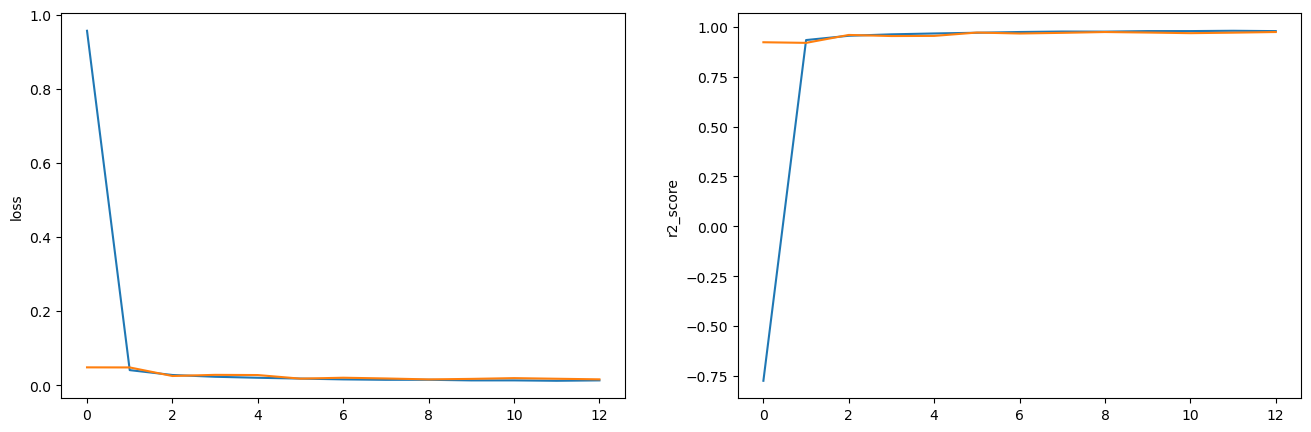

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.lineplot(ax=axes[0],data=historydf, x=historydf.index, y="loss")
sns.lineplot(ax=axes[0],data=historydf, x=historydf.index, y="val_loss")
sns.lineplot(ax=axes[1],data=historydf, x=historydf.index, y="r2_score")
sns.lineplot(ax=axes[1],data=historydf, x=historydf.index, y="val_r2_score")

plt.show()